In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing fandango data

fan = pd.read_csv('fandango_scrape.csv')

In [3]:
fan.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fan.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

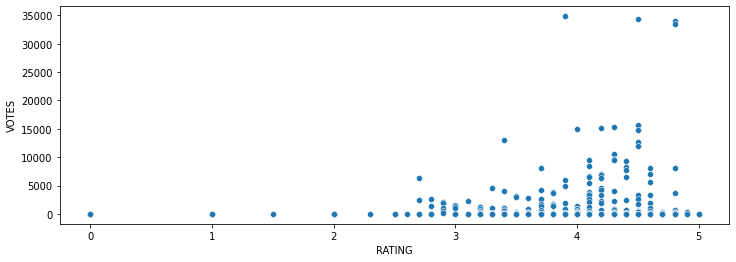

In [7]:
# Scatter plot showing relationship between rating and votes

plt.figure(figsize=(12,4))
sns.scatterplot(x="RATING",y="VOTES",data=fan)

In [8]:
# Columns Correlation
fan.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [21]:
fan["FILM"][0][-5:-1]

'2015'

In [22]:
#Stripping year from film title
fan["YEAR"] = fan['FILM'].apply(lambda title: title[-5:-1])

In [24]:
#value counts for year
fan["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

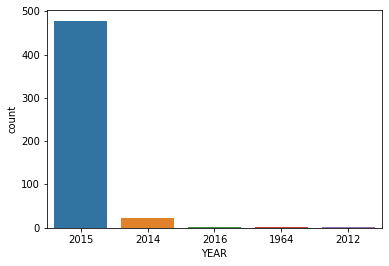

In [138]:
sns.countplot(x="YEAR",data=fan)

In [26]:
# TOp 10 MOvies 
fan.nlargest(n=10,columns="VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [28]:
# 69 films have no votes
len(fan[fan['VOTES'] == 0])

69

In [33]:
#removed all non reviewed movies
reviewed_fan = fan[fan['VOTES'] > 0]

In [34]:
reviewed_fan

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


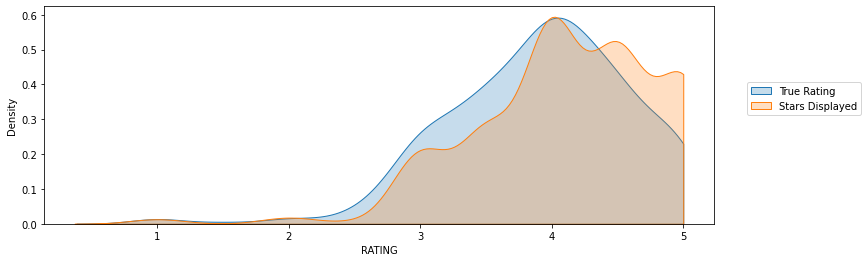

In [139]:
# kde plot on rating vs stars
plt.figure(figsize=(12,4))
sns.kdeplot(x="RATING",data=reviewed_fan,clip=(0,5),shade=True, label="True Rating")
sns.kdeplot(x="STARS",data=reviewed_fan,clip=(0,5),shade=True, label="Stars Displayed")
plt.legend(loc=(1.05,0.5))

In [42]:
#star difference between stars and rating
reviewed_fan['STARS_DIFF'] = round(reviewed_fan['STARS'] - reviewed_fan['RATING'],1)

/tmp/ipykernel_18411/1663103896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_fan['STARS_DIFF'] = round(reviewed_fan['STARS'] - reviewed_fan['RATING'],1)


In [43]:
reviewed_fan

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

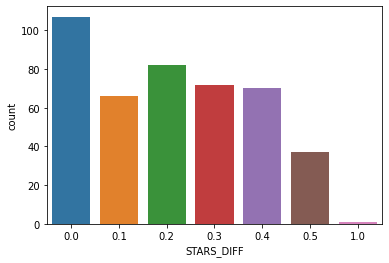

In [45]:
#count plot on diferences
sns.countplot(data=reviewed_fan,x="STARS_DIFF")

In [47]:
reviewed_fan[reviewed_fan['STARS_DIFF'] >=1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [48]:
# now looking at other movie sites

all_sites = pd.read_csv('all_sites_scores.csv')

In [49]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [50]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

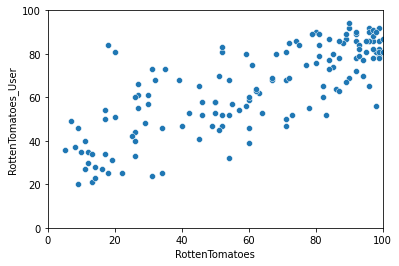

In [140]:
# Rotten Tomatos Scatter plot

sns.scatterplot(x='RottenTomatoes',y="RottenTomatoes_User",data=all_sites)
plt.ylim(0,100)
plt.xlim(0,100)

In [64]:
#calculating difference beteween critics and users
all_sites['RottenDiff'] = all_sites['RottenTomatoes'] - all_sites["RottenTomatoes_User"]

In [55]:
# the mean of all the differences between the ratings
abs(all_sites["RottenDiff"]).mean()

15.095890410958905

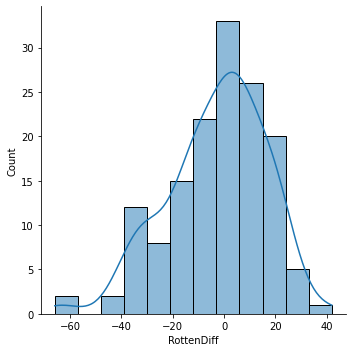

In [59]:
#plot the distrubtion between RT Critcs and RT USErs
sns.displot(x="RottenDiff",data=all_sites, kde=True)

In [69]:
all_sites['AbsRottenDiff'] = abs(all_sites['RottenDiff'])

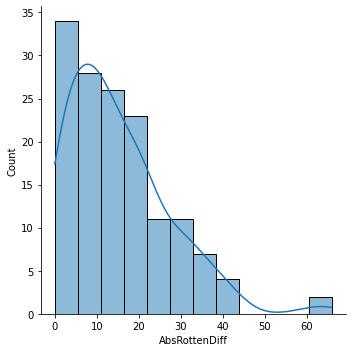

In [70]:
#after taking abs of rotten diff then looking at the difference between the ratings
sns.displot(x="AbsRottenDiff",data=all_sites, kde=True)

In [67]:
#Good movie via users, not critics
all_sites.nsmallest(n=5,columns="RottenDiff")[["FILM",'RottenDiff']]

,FILM,RottenDiff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [141]:
# top 5 critic moves
all_sites.nlargest(n=5,columns="RottenDiff")[["FILM",'RottenDiff']]

,FILM,RottenDiff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 100.0)

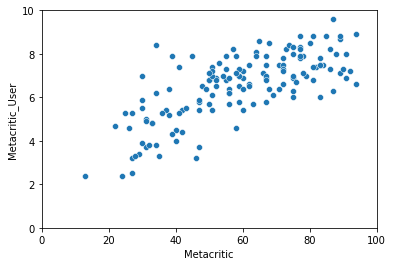

In [144]:
# Now lets look at metacritic
sns.scatterplot(x="Metacritic",y="Metacritic_User",data=all_sites)
plt.ylim(0,10)
plt.xlim(0,100)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

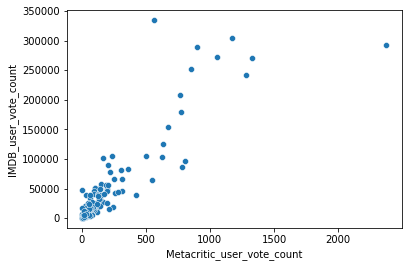

In [72]:
#IMDB

sns.scatterplot(x="Metacritic_user_vote_count",y="IMDB_user_vote_count",data=all_sites)

In [80]:
#film with higest votes for IMDB
all_sites.nlargest(n=1,columns="IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,AbsRottenDiff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [81]:
#film wiht highest votes for metacritic
all_sites.nlargest(n=1,columns="Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,AbsRottenDiff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [82]:
#inner merging all tables
combined = pd.merge(fan,all_sites,how="inner",on="FILM")

In [83]:
combined

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,AbsRottenDiff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9


In [86]:

#Normalizing Rotten Tomato score/20
combined["RT_Norm"] = combined['RottenTomatoes'] / 20
combined["RTU_Norm"] = combined['RottenTomatoes_User'] / 20

#Normalizing Metacrtic score/20 for critics score/2 for users
combined["M_Norm"] = combined['Metacritic'] / 20
combined["MU_Norm"] = combined['Metacritic_User'] / 2

#Normalzing IMDB score/2

combined["IMDB_Norm"] = combined['IMDB'] / 2

In [87]:
combined

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,AbsRottenDiff,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24,4.35,3.15,3.40,3.20,3.35
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14,4.75,4.05,4.35,3.15,3.50
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9,4.65,4.20,3.35,3.50,3.90
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9,4.75,4.30,4.30,3.65,3.70


In [123]:
#putting all normalized scores in one table
norm_scores = combined[["STARS","RATING",'RT_Norm',"RTU_Norm",'M_Norm','MU_Norm','IMDB_Norm','FILM']]

In [124]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10,Fifty Shades of Grey (2015)
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65,Jurassic World (2015)
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70,American Sniper (2015)
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70,Furious 7 (2015)
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.35,3.15,3.40,3.20,3.35,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.75,4.05,4.35,3.15,3.50,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.65,4.20,3.35,3.50,3.90,The Wrecking Crew (2015)
143,4.0,3.9,4.75,4.30,4.30,3.65,3.70,Tangerine (2015)


In [125]:
#function allows us to move legend
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

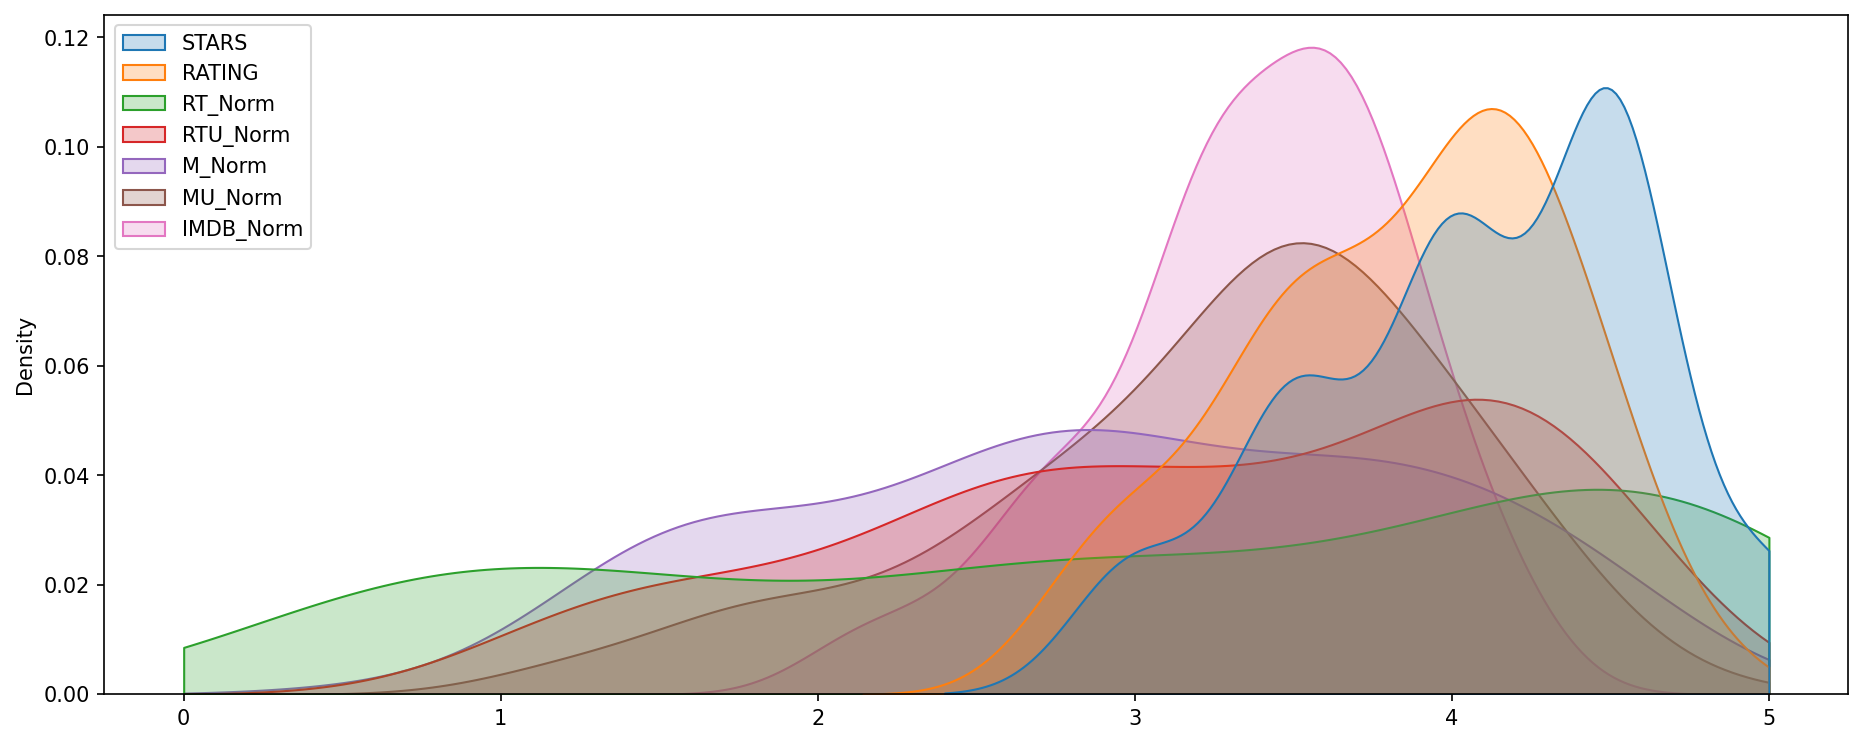

In [126]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,shade=True,clip=(0,5),ax=ax)
move_legend(ax,'upper left')

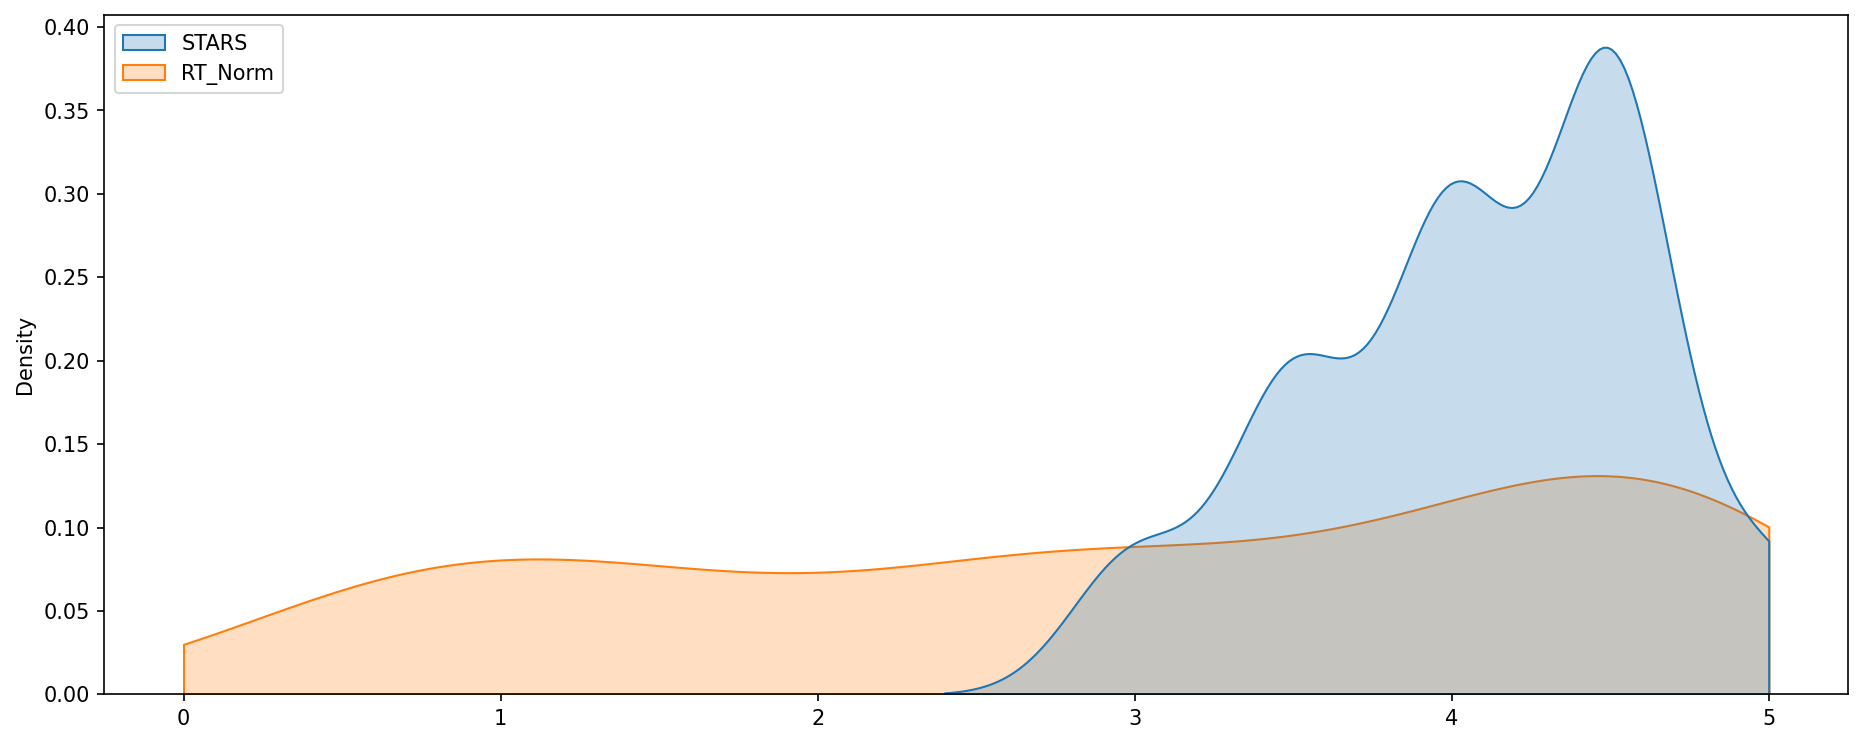

In [146]:
#creating kde to compare dist between RT critics and Stars
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[["STARS", 'RT_Norm']], clip=(0,5),shade=True)
move_legend(ax,'upper left')

<AxesSubplot:ylabel='Count'>

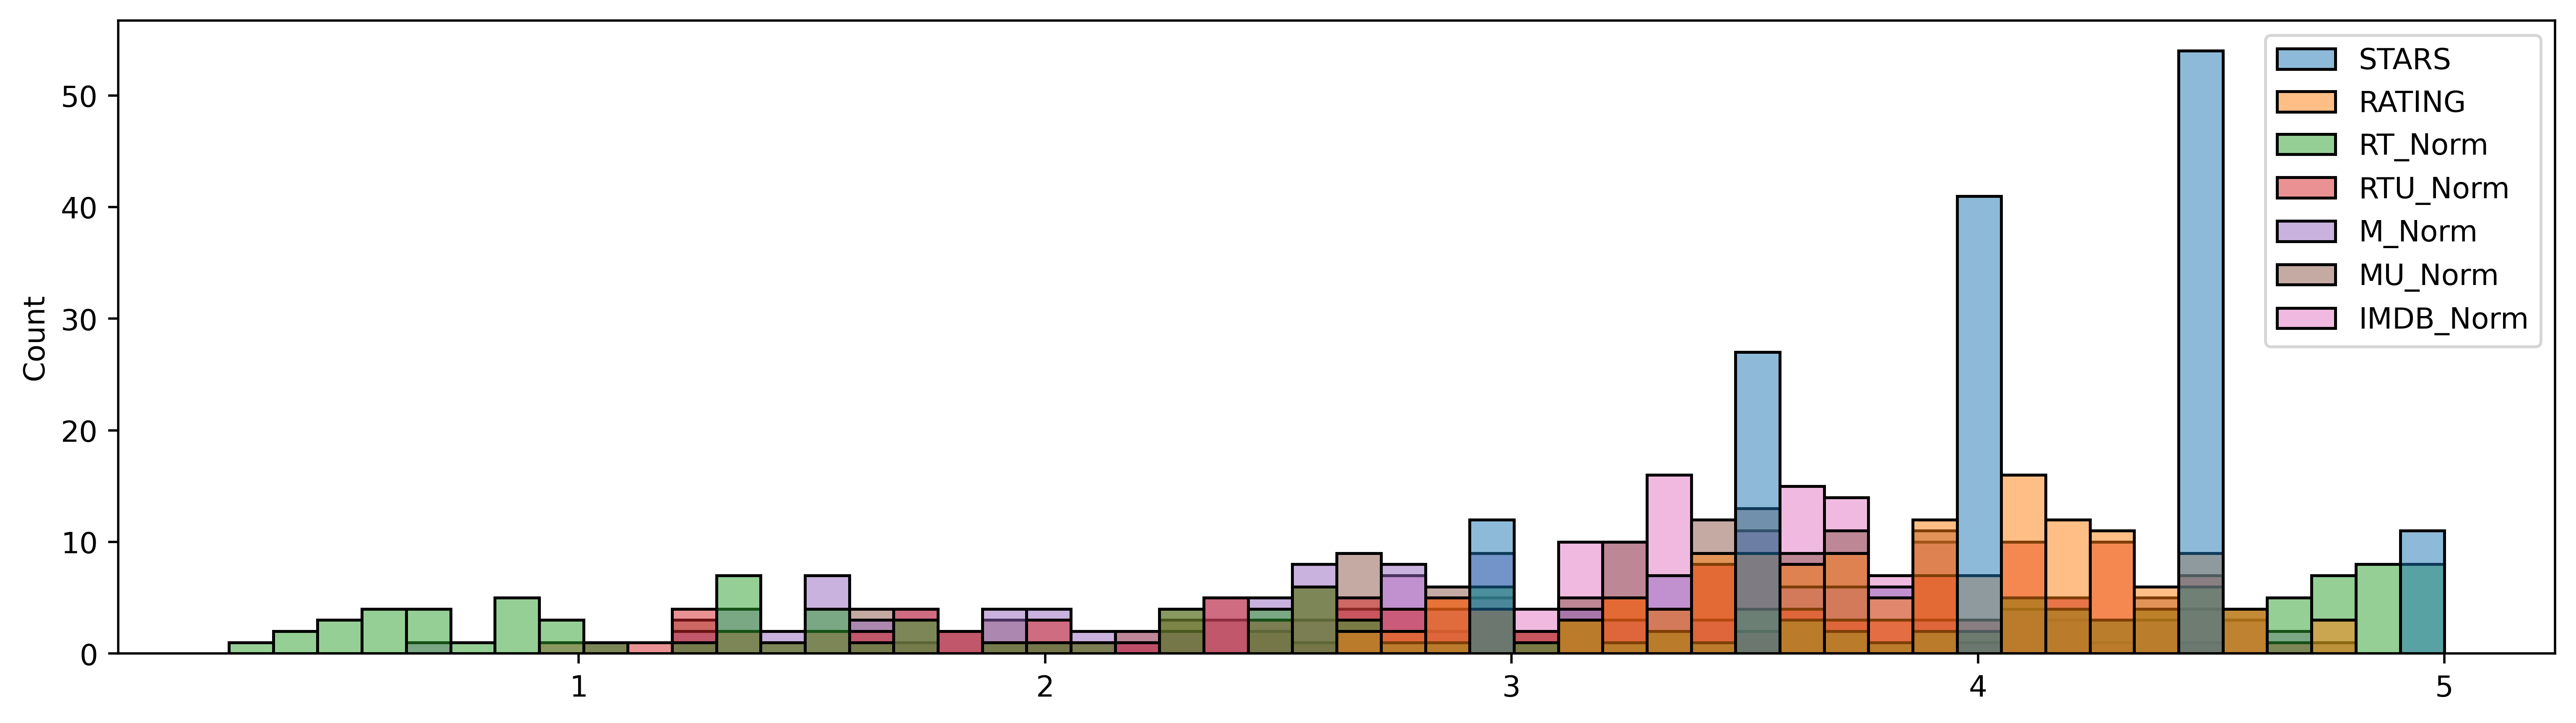

In [148]:
#Creating hist of normalized scores

plt.figure(figsize=(15,4),dpi=500)
sns.histplot(data=norm_scores,bins=50)

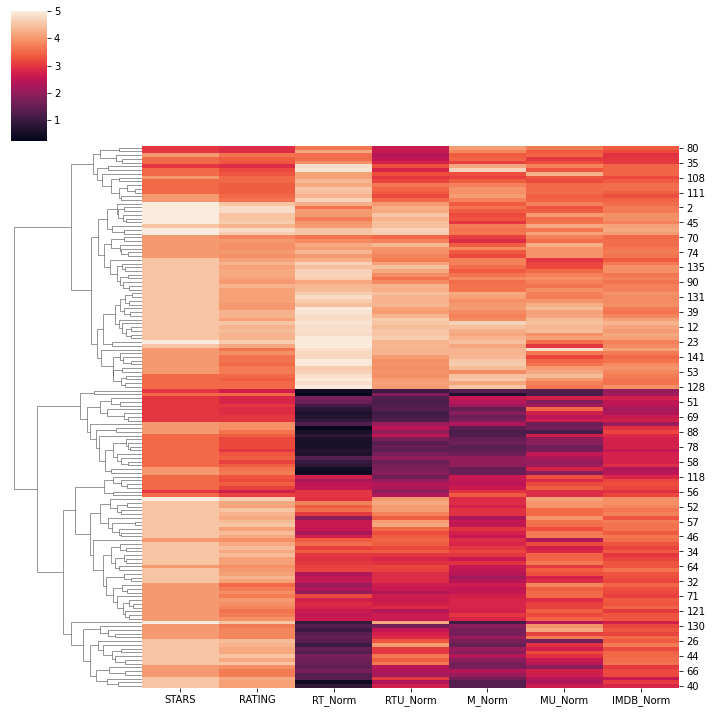

In [149]:
#cluster map on bad movies
sns.clustermap(data=norm_scores.drop('FILM',axis=1),col_cluster=False)

In [133]:
# worse moveis according to RT
bottom_10 = norm_scores.nsmallest(n=10, columns="RT_Norm")

<AxesSubplot:ylabel='Density'>

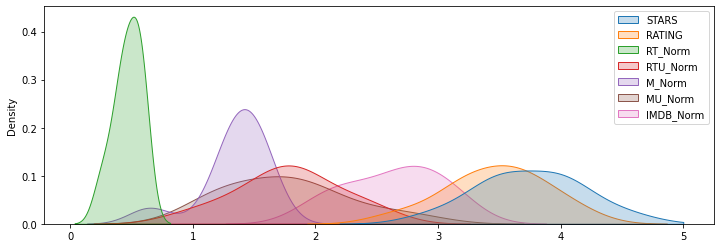

In [137]:
#a KDE on all soruces about the movies
plt.figure(figsize=(12,4))
sns.kdeplot(data=bottom_10,shade=True,clip=(0,5))